In [1]:
import json
import glob

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
dfs = []
for filename in sorted(glob.glob("/mnt/binder-logs/events-2020-*.jsonl")):
    dfs.append(pd.read_json(filename,
                            orient="records",
                            lines=True,
                            convert_dates="timestamp"))
binder = pd.concat(dfs)
binder.index = binder["timestamp"]
binder

,timestamp,schema,version,provider,spec,ref,status,origin
timestamp,,,,,,,,
2020-07-10 00:00:00+00:00,2020-07-10 00:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,PythonLycee/PyLyc/master,e10f1ba3718bbc1b1ff26d0d20ea209c63ccdc1c,success,gke.mybinder.org
2020-07-10 00:00:00+00:00,2020-07-10 00:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org
2020-07-10 00:00:00+00:00,2020-07-10 00:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ganga-devs/ganga/BinderTutorial,5e51038cc11d404743066cc6735c7554432a9aa8,success,gke.mybinder.org
2020-07-10 00:00:00+00:00,2020-07-10 00:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org
2020-07-10 00:00:00+00:00,2020-07-10 00:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ubermag/workshop/master,f156aa75e501f2ad5e384a00f1776db9a7628869,success,gesis.mybinder.org
...,...,...,...,...,...,...,...,...
2020-07-28 13:59:00+00:00,2020-07-28 13:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org
2020-07-28 13:59:00+00:00,2020-07-28 13:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org
2020-07-28 13:59:00+00:00,2020-07-28 13:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,explosion/spacy-io-binder/live,46f7d6ffd6ec206023fbbc23b7a879fde19b3498,success,gke.mybinder.org


In [4]:
label = np.empty(len(binder), dtype="O")

label[binder.spec.str.contains("jpivarski/2020-07-13-pyhep2020-tutorial")] = "uproot"
label[binder.spec.str.contains("CoffeaTeam/coffea/ak1-nano-demo")] = "nanoevents"
label[binder.spec.str.contains("ganga-devs/ganga/BinderTutorial")] = "ganga"
label[binder.spec.str.contains("stwunsch/pyhep2020-pyroot")] = "pyroot"
label[binder.spec.str.contains("HDembinski/pyhep-2020-resample")] = "resample"
label[binder.spec.str.contains("riga/law_pyhep2020")] = "luigi"
label[binder.spec.str.contains("CoffeaTeam/coffea-casa-tutorials")] = "coffea"
label[binder.spec.str.contains("lukasheinrich/pyhep2020-autodiff-tutorial")] = "autodiff"
label[binder.spec.str.contains("phinate/neos")] = "neos"
label[binder.spec.str.contains("henryiii/python-performance-minicourse")] = "fastpython"
label[binder.spec.str.contains("zfit/PyHEP2020")] = "zfit"
label[binder.spec.str.contains("SModelS/pyhep2020")] = "smodels"
label[binder.spec.str.contains("HDembinski/pyhep-2020-iminuit")] = "iminuit"
label[binder.spec.str.contains("kropiv/MLforNIatPyHEP")] = "nuclearinteract"
label[binder.spec.str.contains("pyhf/tutorial-PyHEP-2020")] = "pyhf"
label[binder.spec.str.contains("henryiii/bh-talk-pyhep-2020")] = "boosthist"
label[binder.spec.str.contains("andrzejnovak/2020-07-17-pyhep2020-mplhep")] = "mplhep"
label[binder.spec.str.contains("matt-komm/pyhep20_tfpipeline")] = "roottf"
label[binder.spec.str.contains("cburton12/94e1f6d7b966d965c464cb56f3539859")] = "daq"
label[binder.spec.str.contains("prasanthcakewalk/ThickBrick-Tutorial-PyHEP-2020")] = "thickbrick"

binder["label"] = label

In [5]:
binder_ours = binder[~pd.isna(binder["label"])]

In [131]:
offsets = [
    "2020-07-10 00:00:00",
    "2020-07-13 08:00:00",
    "2020-07-13 08:10:00",
    "2020-07-13 09:10:00",
    "2020-07-13 09:40:00",
    "2020-07-13 10:10:00",
    "2020-07-13 10:55:00",
    "2020-07-13 11:25:00",
    "2020-07-13 17:00:00",
    "2020-07-13 17:10:00",
    "2020-07-13 17:50:00",
    "2020-07-13 18:35:00",
    "2020-07-14 08:00:00",
    "2020-07-14 08:40:00",
    "2020-07-14 09:10:00",
    "2020-07-14 09:40:00",
    "2020-07-14 10:10:00",
    "2020-07-14 10:40:00",
    "2020-07-14 11:25:00",
    "2020-07-14 17:00:00",
    "2020-07-14 17:45:00",
    "2020-07-14 18:15:00",
    "2020-07-15 08:00:00",
    "2020-07-15 08:45:00",
    "2020-07-15 09:15:00",
    "2020-07-15 09:45:00",
    "2020-07-15 10:30:00",
    "2020-07-15 11:00:00",
    "2020-07-15 17:00:00",
    "2020-07-15 18:00:00",
    "2020-07-16 08:00:00",
    "2020-07-16 08:45:00",
    "2020-07-16 09:15:00",
    "2020-07-16 09:45:00",
    "2020-07-16 10:15:00",
    "2020-07-16 10:45:00",
    "2020-07-16 11:15:00",
    "2020-07-16 17:00:00",
    "2020-07-16 17:30:00",
    "2020-07-16 18:15:00",
    "2020-07-17 08:00:00",
    "2020-07-17 08:30:00",
    "2020-07-17 09:00:00",
    "2020-07-17 09:30:00",
    "2020-07-17 10:00:00",
    "2020-07-17 10:30:00",
    "2020-07-17 11:00:00",
    "2020-07-17 17:00:00",
    "2020-07-17 17:30:00",
    "2020-07-17 18:15:00",    
    "2020-07-30 00:00:00",    
]

In [132]:
attendance = [
    0,
    0,
    300,
    430,
    0,
    339,
    316,
    239,
    0,
    49,
    72,
    64,
    0,
    320,
    317,
    289,
    0,
    174,
    135,
    0,
    55,
    55,
    0,
    194,
    186,
    0,
    147,
    147,
    0,
    79,
    0,
    183,
    143,
    0,
    147,
    148,
    136,
    0,
    68,
    58,
    0,
    164,
    156,
    156,
    0,
    113,
    119,
    0,
    49,
    44,
    0,
    0,
]

In [133]:
zoom_attendance = pd.DataFrame(
    [(pd.to_datetime(offsets[i]) + pd.to_timedelta("5 hours"), attendance[i + j]) for i in range(len(offsets)) for j in range(2)],
columns=["timestamp", "Zoom attendance"])
zoom_attendance.index = zoom_attendance["timestamp"]
zoom_attendance = zoom_attendance["Zoom attendance"]

In [166]:
columns = ["uproot", "nanoevents", "ganga", "pyroot", "resample", "luigi", "coffea", "autodiff",
           "neos", "fastpython", "zfit", "smodels", "iminuit", "nuclearinteract", "pyhf", "boosthist",
           "mplhep", "roottf", "daq", "thickbrick"]
regular = pd.DataFrame(
    index=pd.to_datetime(np.arange(binder.index.view(np.int64).min(), binder.index.view(np.int64).max(), 60*60*1e9), unit="ns"),
    columns=columns)
regular.index.name = "timestamp"
for column in columns:
    tmp = binder_ours[binder_ours["label"] == column].groupby(pd.Grouper(freq="60 min"))["ref"].count()
    tmp.index = tmp.index.astype(regular.index.dtype)
    regular[column] = tmp
regular = regular.fillna(0)

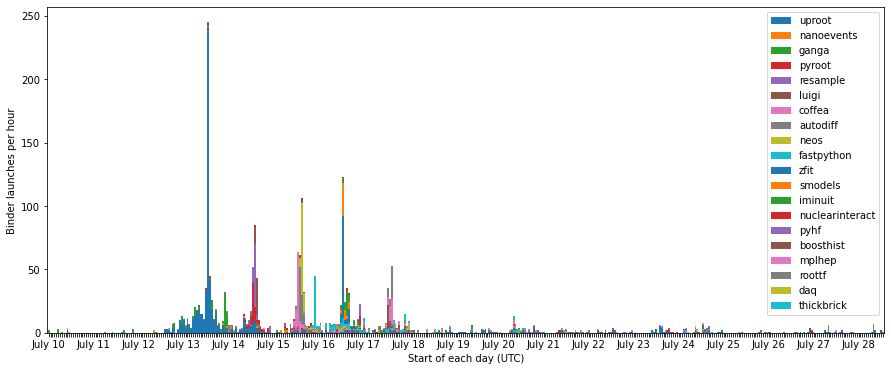

In [167]:
ax = regular.plot.bar(stacked=True, rot=0, width=1.0, figsize=(15, 6))
ticklabels = np.where(regular.index.strftime("%H:%M") == "00:00", regular.index.strftime("July %d"), None)
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))
ax.set_xlabel("Start of each day (UTC)")
ax.set_ylabel("Binder launches per hour")

In [168]:
regular["Binder requests per hour"] = regular.sum(axis=1)

/mnt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
/mnt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


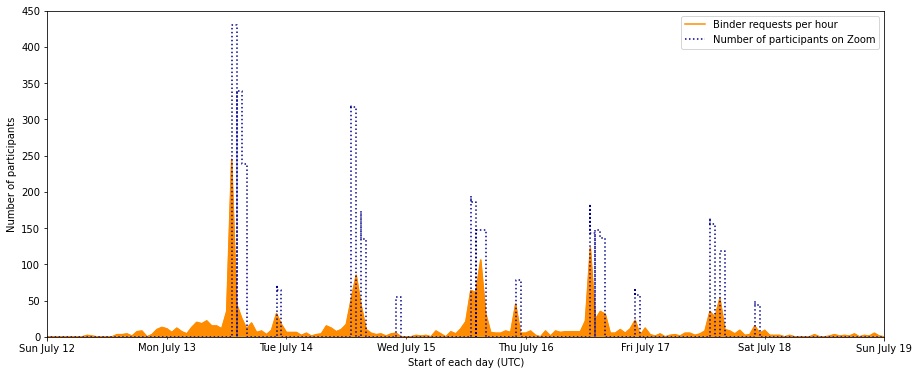

In [170]:
ax = regular["Binder requests per hour"].plot.area(color="darkorange", figsize=(15, 6))
zoom_attendance.plot(c="darkblue", ls=":", ax=ax)
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter([
    "Sun July 12",
    "Sun July 19",
]))
ax.xaxis.set_minor_formatter(matplotlib.ticker.FixedFormatter([
    "Mon July 13",
    "Tue July 14",
    "Wed July 15",
    "Thu July 16",
    "Fri July 17",
    "Sat July 18",
]))
ax.set_xlabel("Start of each day (UTC)")
ax.set_ylabel("Number of participants")
ax.set_xlim(pd.to_datetime("2020-07-12"), pd.to_datetime("2020-07-19"))
ax.set_ylim(0, 450)
ax.legend(["Binder requests per hour", "Number of participants on Zoom"]);